# 커널 주성분분석(PCA) 실습

#####  커널 PCA
---

기존 데이터 행렬의 공간보다 큰 고차원 공간으로 매핑한다. 매핑 함수를 $\boldsymbol{\Phi}$ 라고 한다. 

이때 $\boldsymbol{\Phi}$를 어떻게 선택하느냐에 따라 다른 공간으로 이동하게 되는데, 새로운 공간으로 이동한 데이터에 대해 주성분 분석을 수행한다. 

새로운 공간의 데이터 포인트에 대해 공분산 행렬을 구한다. 구한 공분산 행렬에서 pca를 하면 새로운 좌표축 즉 주성분 벡터가 있게 된다.

그리고 마지막으로 새로운 공간의 데이터를 다시 원래 공간으로 매핑시키면 곡선 형태의 주성분 축을 얻게 된다.


##### 10.3.2 와인 데이터를 활용하여 커널PCA 를 시행해본다.


# Dataset import
## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
# 데이터 셋 내 피처 살펴보기
raw_wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# 피처, 타깃 데이터 지정

In [3]:
X = raw_wine.data
y = raw_wine.target

## 트레이닝, 테스트 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 1)

## 데이터 표준화

In [5]:
from sklearn.preprocessing import StandardScaler

# X 트레이닝 데이터 기준으로 std scaler fitting, Xtn Xte모두.
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# 커널 PCA를 통한 차원 축소

n_components 옵션을 사용하여 줄이고 싶은 차원수를 설정한다.

커널의 형태는 linear, poly, rbf, sigmoid, cosine, precomputed 등이 있다.

In [7]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'poly')  # 커널 PCA모형 설정. 축소할 차원을 설정
kpca.fit(X_tn_std)    # 적합

X_tn_kpca = kpca.transform(X_tn_std)  # 각각 차원축소 시킴
X_te_kpca = kpca.transform(X_te_std)

## 데이터 차원 축소 확인

In [8]:
# 원래의 데이터 크기

print(X_tn_std.shape)

(133, 13)


In [10]:
# 축소된 데이터 크기

print(X_tn_kpca.shape)

(133, 2)


2차원으로 차원축소가 잘 되었다.

## 고윳값, 고유 벡터 확인: .lambdas_ , .alphas_

공분산 행렬을 얻을 수는 없지만, 데이터의 고윳값, 고유벡터를 확인할 수 있다.

(lambdas 에서 아이겐밸류로 바뀐다고 한다. 고유값이 람다로 써지긴 하지만 아마 직관적이지 못했어서 그런가보다. 마찬가지로 alphas도 eigenvector로 바뀐다고)

In [12]:
print(kpca.lambdas_)

[193.89824561 118.0368972 ]


/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
print(kpca.eigenvalues_)

[193.89824561 118.0368972 ]


In [15]:
print(kpca.alphas_)

[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]
 [ 0.107761    0.08440051]
 

/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
print(kpca.eigenvectors_)

[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]
 [ 0.107761    0.08440051]
 

고유벡터가 바로 각 고윳값에 대응되는 고유 벡터로 이 고유 벡터가 바로 주성분 벡터이다.

차원축소 후 해당 성분의 설명되는 분산을 볼 차례인데 kpca는 제공하지 않는다. 

## 차원 축소 데이터 확인

데이터 프레임으로 바꾸는 이유는 데이터 시각화에 유리하기 때문이다.

In [19]:
# 해당 pca 데이터를 데이터 프레임으로 만들고 성분에 이름을 붙여준다.

kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_tn_kpca, columns = kpca_columns)

# 그리고 타겟 데이터에 y_tn을 붙여준다.

X_tn_kpca_df['target'] = y_tn
X_tn_kpca_df.head(5)

,kpca_comp1,kpca_comp2,target
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0


## 라벨 미적용 PCA 데이터 시각화

차원 축소된 데이터를 시각화 해본다.

라벨이 적용되지 않았다는 말은 타깃 데이터가 없는 경우를 말하는 것이다. 각 데이터가 어떤 와인 클래스를 나타내는지 모른다.

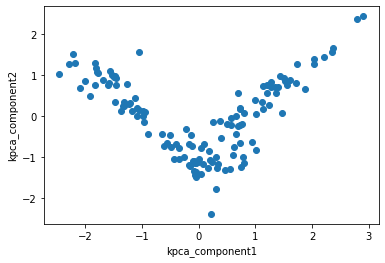

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_tn_kpca_df['kpca_comp1'], X_tn_kpca_df['kpca_comp2'], marker = 'o') # 각 피처를 요소에 넣고, 마커를 설정
plt.xlabel('kpca_component1')
plt.ylabel('kpca_component2')
plt.show()

## 라벨 적용 PCA 데이터 시각화

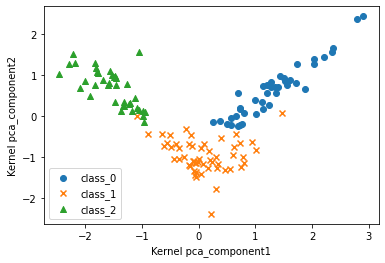

In [21]:
df = X_tn_kpca_df
markers = ['o', 'x', '^']                   # 데이터 포인트 마커 지정

for i, mark in enumerate(markers):          # 클래스가 3개이기 때문에 3번 반복됨. 마커가 3개로 3번 반복된다.
    df_i = df[df['target']== i]             # 해당 클래스가 있는 데이터프레임 지정
    target_i = raw_wine.target_names[i]     # 클래스 저장
    X1 = df_i['kpca_comp1']
    X2 = df_i['kpca_comp2']
    plt.scatter(X1, X2, marker = mark, label = target_i)

plt.xlabel('Kernel pca_component1')
plt.ylabel('Kernel pca_component2')
plt.legend()                                               # 범례 추가하기
plt.show()

# kernel PCA 적용 전후 데이터 예측 정확도 측정

## kernel PCA 적용 이전 데이터 학습

In [22]:
# 랜덤포레스트분류기 사용
from sklearn.ensemble import RandomForestClassifier

clf_rf_std = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_std.fit(X_tn_std, y_tn)
pred_rf_std = clf_rf_std.predict(X_te_std)

### 적용 전 예측 정확도

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_std)

print(accuracy)

0.9777777777777777


## kernel PCA 적용 이후 데이터 학습

In [25]:
# from sklearn.ensemble import RandomForestClassifier

clf_rf_kpca = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_kpca.fit(X_tn_kpca, y_tn)
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca)

### 적용 후 예측 정확도

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_kpca)

print(accuracy)

0.9555555555555556


일반 PCA를 했을 때와 같은 정확도가 나왔다. 궁금하니까, confusion matrix도 볼 수 있을까?

# confusion matrix 비교

## kernel PCA 전

In [27]:
# kpca 전

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_std)
print(conf_matrix)

[[18  0  0]
 [ 1 16  0]
 [ 0  0 10]]


## kernel PCA 후

In [28]:
# kpca 후

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_kpca)
print(conf_matrix)

[[18  0  0]
 [ 1 16  0]
 [ 1  0  9]]


# report 비교

## kernel PCA 전

In [29]:
# kpca 전

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_std)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## kernel PCA 후

In [30]:
# kpca 후

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_kpca)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.94      0.97        17
           2       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# 실험: n_composition = 3 일때 kernel PCA

In [34]:
import pandas as pd
import numpy as np

# data import
from sklearn import datasets

raw_wine = datasets.load_wine()
X = raw_wine.data
y = raw_wine.target


# train/test data split
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 1)


# data standardization
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


# pca modeling
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 3)           # 3차원으로 만드는 모델
kpca.fit(X_tn_std)                           # 데이터 적합

X_tn_kpca = kpca.transform(X_tn_std)
X_te_kpca = kpca.transform(X_te_std)


# checking
print('origin data volume:', X_tn_std.shape)
print('after pca volume:', X_tn_kpca.shape)

# 고유값 고유벡터
print("eigenvalues:", kpca.eigenvalues_)
print("eigenvectors:", kpca.eigenvectors_)

# # explained variance
# print("explained variance:", pca.explained_variance_)
# print("explained variance ratio:", pca.explained_variance_ratio_)


# # pca data -> DataFrame for visualization
# pca_columns = ['pca_comp1', 'pca_comp2']
# X_tn_pca_df = pd.DataFrame(X_tn_pca, columns = pca_columns)
# X_tn_pca_df['target'] = y_tn


# # visualization
# df = X_tn_pca_df
# markers = ['o', 'x', '^']                   # 데이터 포인트 마커 지정

# for i, mark in enumerate(markers):          # 클래스가 3개이기 때문에 3번 반복됨. 마커가 3개로 3번 반복된다.
#     df_i = df[df['target']== i]             # 해당 클래스가 있는 데이터프레임 지정
#     target_i = raw_wine.target_names[i]     # 클래스 저장
#     X1 = df_i['pca_comp1']
#     X2 = df_i['pca_comp2']
#     plt.scatter(X1, X2, marker = mark, label = target_i)

# plt.xlabel('pca_component1')
# plt.ylabel('pca_component2')
# plt.legend()                                               # 범례 추가하기
# plt.show()


# # before pca
from sklearn.ensemble import RandomForestClassifier
# clf_rf_std = RandomForestClassifier(max_depth = 2, random_state = 1)
# clf_rf_std.fit(X_tn_std, y_tn)
# pred_rf_std = clf_rf_std.predict(X_te_std)

# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_te, pred_rf_std)
# print("before pca accuracy:", accuracy)

# after pca
clf_rf_kpca = RandomForestClassifier(max_depth = 2, random_state = 1)
clf_rf_kpca.fit(X_tn_kpca, y_tn)
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca)

accuracy = accuracy_score(y_te, pred_rf_kpca)
print("after pca accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf_kpca)
print(conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf_kpca)
print(class_report)

origin data volume: (133, 13)
after pca volume: (133, 3)
eigenvalues: [615.93183073 335.53461284 196.54124048]
eigenvectors: [[-8.99287127e-02 -8.11255534e-03 -4.85717684e-02]
 [-5.49780499e-02  2.30716140e-02 -8.10675916e-02]
 [-7.72856145e-02 -1.09986115e-01  8.35291511e-02]
 [-1.42609209e-01 -1.57138148e-01 -3.92783589e-02]
 [-1.28226427e-01 -1.10278675e-01 -2.25357618e-02]
 [ 5.59267299e-02  7.30861124e-02  2.39580744e-01]
 [ 9.81281545e-02 -1.09433043e-01 -6.36323955e-02]
 [ 1.09794784e-01 -7.24839601e-02 -2.98627446e-02]
 [-8.97611128e-02 -4.88981196e-02 -6.71460046e-02]
 [ 4.34953181e-02  1.17845428e-01 -7.79202008e-03]
 [-1.03066267e-01 -3.50126881e-02  6.55587285e-02]
 [-9.15771717e-02 -5.06494130e-02  9.70563123e-02]
 [-4.93379079e-02  8.74882413e-02  1.07187893e-01]
 [ 1.17471759e-01 -1.20403091e-02 -7.87970024e-02]
 [-9.99129180e-02  9.57446973e-02 -1.52945535e-01]
 [ 1.01067839e-02  4.63758175e-02  3.99964237e-02]
 [-7.76633946e-02 -1.02765666e-01  5.55671214e-02]
 [ 1.161

오히려 정확도는 떨어졌다. 재밌는 건 kernel PCA를 진행했음에도 주성분분석을 했을 때와 같은 결과인 것이다. 주성분 3개만 사용하기로 한 것만 같은데 말이다.